Basic usage aglcheck
===

In [23]:
# import modules and functions we need
from __future__ import print_function
%matplotlib inline
from IPython.core.display import HTML
from aglcheck import compare_sets, examplestringdata, get_examplestringdata, htmltables, \
    read_stringdata, StringData, plotting

Reading strings
---

Before we can do anything, we need to get the strings into a _StringData_ object. There are two ways of doing this.

1) Provide strings directly

In [2]:
sd = StringData(strings=['ABA', 'BAB', 'AABA', 'BBA', 'BAA', 'ABBA'])
print(sd)

All:
    ABA  : ABA
    BAB  : BAB
    AABA : AABA
    BBA  : BBA
    BAA  : BAA
    ABBA : ABBA




Note that the strings automaltically get labels that are identical to the strings themselves, since we didn't provide any different labels. 

2) Read strings from a special text file (yaml format) that is human readable and writeable and that contains the string information. See '<a href="examplestringfilesimple.yaml">examplestringfilesimple.yaml</a>' for an example that you can use as a template. This is more convenient if you have larger stringsets, or you want to save them.

In [4]:
sd = read_stringdata('examplestringfilesimple.yaml')
print(sd)

All:
    ABA  : ABA
    BAB  : BAB
    AABA : AABA
    BBA  : BBA
    BAA  : BAA
    ABBA : ABBA




You can provide more information of the stringsets in such a file, for example descriptive string labels. And also string categories that can be used in comparisons. See for examle '<a href="examplestringfile.yaml">examplestringfile.yaml</a>', which you can use as a template.

In [7]:
sd = read_stringdata('examplestringfile.yaml')
print(sd)

All:
    Go    : ABA
    NoGo  : BAB
    Test1 : BAA
    Test2 : BBA
    Test3 : AABA
    Test4 : ABBA

Training: [Go, NoGo]

Test: [Test1, Test2, Test3, Test4]

TestSimple: [Test1, Test2]

TestComplex: [Test3, Test4]




Comparing strings
---

Next, we want to compare the strings in the data set, using a comparison function. For example, we want to look for the longest shared substrings.

In [12]:
cm = compare_sets.longestsharedsubstringlength(sd)

The object that was returned, a ComparisonMatrix, can be used for different things, such as direct vizualization of the results in an image plot:

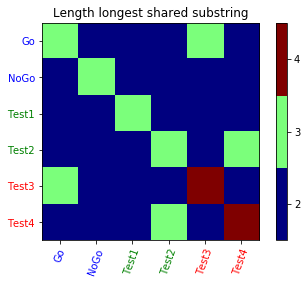

In [13]:
ax = plotting.plot_comparison(cm)

You can also compare only specific string categories as long as they are defined in the stringdata:

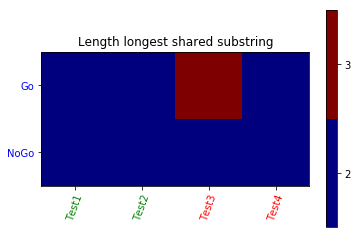

In [24]:
cm = compare_sets.longestsharedsubstringlength(sd, comparison=('Test', 'Training'))
ax = plotting.plot_comparison(cm)

Or to get the results as a matrix that can be used for further evaluations:

In [16]:
ct.get_matrix()

[[3, 2, 2, 2, 3, 2],
 [2, 3, 2, 2, 2, 2],
 [2, 2, 3, 2, 2, 2],
 [2, 2, 2, 3, 2, 3],
 [3, 2, 2, 2, 4, 2],
 [2, 2, 2, 3, 2, 4]]

The order of the rows and columns correspond to the sequence of strings in the StringData object

In [17]:
sd.strings

['ABA', 'BAB', 'BAA', 'BBA', 'AABA', 'ABBA']

Alternatively, you want an HTML table that highlights the longest shared substrings. The returned HTML code can be written to file or shown in a notebook. To do the latter use the ipython HTML function. 

In [20]:
htmlcode = htmltables.longestsharedsubstringstable(sd) 
HTML(htmlcode)

,GoABA,NoGoBAB,Test1BAA,Test2BBA,Test3AABA,Test4ABBA
GoABA,ABA ABA,ABA BABABA BAB,ABA BAA,ABA BBA,ABA AABA,ABA ABBAABA ABBA
NoGoBAB,BAB ABABAB ABA,BAB BAB,BAB BAA,BAB BBA,BAB AABABAB AABA,BAB ABBABAB ABBA
Test1BAA,BAA ABA,BAA BAB,BAA BAA,BAA BBA,BAA AABABAA AABA,BAA ABBA
Test2BBA,BBA ABA,BBA BAB,BBA BAA,BBA BBA,BBA AABA,BBA ABBA
Test3AABA,AABA ABA,AABA BABAABA BAB,AABA BAAAABA BAA,AABA BBA,AABA AABA,AABA ABBAAABA ABBA
Test4ABBA,ABBA ABAABBA ABA,ABBA BABABBA BAB,ABBA BAA,ABBA BBA,ABBA AABAABBA AABA,ABBA ABBA


If you want to save the html to a file, you can use the 'htmltables.save_html' function. The parameter 'include_doctags' determines, if you want to make it a full html document that can be opened in a browser, or just the table html code itself.

In [22]:
htmltables.save_html(htmlcode=htmlcode, filename='exampletable.html', include_doctags=True)

Other comparisons
-------------------

We looked at the 'longestsharedsubstrings' functions above, but we can look at different kinds of similarities between string sets.

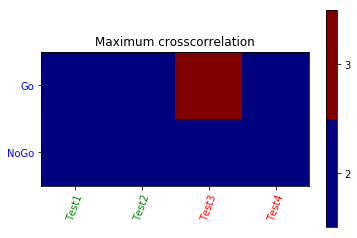

In [26]:
cm = compare_sets.crosscorrelationmax(sd, comparison=('Test', 'Training'))
ax = plotting.plot_comparison(cm)